### Project Title : DengAI Predicting Disease Spread
### Members :
<ul>
    <b>Amar Pal Singh</b><br/>
    <b>Kailash Singh Negi</b>
</ul>

### Problem Statement:
The goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. In this project, we’ve to predict total number of week wise cases of dengue fever for San Juan, Puerto Rico and Iquitos, Peru.

### Hypothesis

<ul><li>Because dengue fever is a tropical disease, we would expect it to be more popular in place with high temperature, high precipitation and thus high humidity.</li>
<li>The disease is transmitted by mosquitoes, whose peak season is summer, so we will expect summer to have more dengue cases than the rest of the year.</li>
<li>Iquitos is a Peruvian port city and gateway to the jungle lodges and tribal villages of the northern Amazon. Surrounded by green spaces and water sources, it is an ideal environment for mosquitoes. San juan, in the other hand, is a city on an island (more isolated) and has a much lower population density than Iquitos.</li></ul>

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import xgboost as xgb
# from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [226]:
# # train = pd.read_csv("Data/Training_Data_Features.csv")
# train["total_cases"] = pd.read_csv("Data/Training_Data_Labels.csv")["total_cases"]
# train["Type"] = "train"

# test = pd.read_csv("Data/Test_Data_Features.csv")
# test["total_cases"] = np.nan
# test["Type"] = "test"
# print(train.shape)
# print(test.shape)


train = pd.read_csv("C:/Users/abc/Desktop/Data Analytics/Projects/DengAI - Predicting Disease Spread/dengue_features_train.csv")
train["total_cases"] = pd.read_csv("C:/Users/abc/Desktop/Data Analytics/Projects/DengAI - Predicting Disease Spread/dengue_labels_train.csv")["total_cases"]
train["Type"] = "train"

test = pd.read_csv("C:/Users/abc/Desktop/Data Analytics/Projects/DengAI - Predicting Disease Spread/dengue_features_test.csv")
test["total_cases"] = np.nan
test["Type"] = "test"
print(train.shape)
print(test.shape)

(1456, 26)
(416, 26)


In [227]:
dframes = [train,test]
data = pd.concat(dframes,ignore_index = True)
print(data.shape)
data.head()

(1872, 26)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,Type
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0,train
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0,train
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0,train
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0,train
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0,train


## Description about the features

<b><i>City and date indicators</i></b><br/>
<b>city</b> – City abbreviations: sj for San Juan and iq for Iquitos<br/>
<b>week_start_date</b> – Date given in yyyy-mm-dd format<p/>
<b><i>NOAA's GHCN daily climate data weather station measurements</i></b><br/>
<b>station_max_temp_c</b> – Maximum temperature<br/>
<b>station_min_temp_c</b> – Minimum temperature<br/>
<b>station_avg_temp_c</b> – Average temperature<br/>
<b>station_precip_mm</b> – Total precipitation<br/>
<b>station_diur_temp_rng_c</b> – Diurnal temperature range<p/>
<b><i>PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</i></b><br/>
<b>precipitation_amt_mm</b> – Total precipitation<p/>
<b><i>NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</i></b><br/>
<b>reanalysis_sat_precip_amt_mm</b> – Total precipitation<br/>
<b>reanalysis_dew_point_temp_k</b> – Mean dew point temperature<br/>
<b>reanalysis_air_temp_k</b> – Mean air temperature<br/>
<b>reanalysis_relative_humidity_percent</b> – Mean relative humidity<br/>
<b>reanalysis_specific_humidity_g_per_kg</b> – Mean specific humidity<br/>
<b>reanalysis_precip_amt_kg_per_m2</b> – Total precipitation<br/>
<b>reanalysis_max_air_temp_k</b> – Maximum air temperature<br/>
<b>reanalysis_min_air_temp_k</b> – Minimum air temperature<br/>
<b>reanalysis_avg_temp_k</b> – Average air temperature<br/>
<b>reanalysis_tdtr_k</b> – Diurnal temperature range<p/>
<b><i>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</i></b><br/>
<b>ndvi_se</b> – Pixel southeast of city centroid<br/>
<b>ndvi_sw</b> – Pixel southwest of city centroid<br/>
<b>ndvi_ne</b> – Pixel northeast of city centroid<br/>
<b>ndvi_nw</b> – Pixel northwest of city centroid<br/>


#### Checking if thre are any duplicate rows

In [228]:
np.sum(data.duplicated())

0

#### checking for missing values

In [229]:
data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  237
ndvi_nw                                   63
ndvi_se                                   23
ndvi_sw                                   23
precipitation_amt_mm                      15
reanalysis_air_temp_k                     12
reanalysis_avg_temp_k                     12
reanalysis_dew_point_temp_k               12
reanalysis_max_air_temp_k                 12
reanalysis_min_air_temp_k                 12
reanalysis_precip_amt_kg_per_m2           12
reanalysis_relative_humidity_percent      12
reanalysis_sat_precip_amt_mm              15
reanalysis_specific_humidity_g_per_kg     12
reanalysis_tdtr_k                         12
station_avg_temp_c                        55
station_diur_temp_rng_c                   55
station_max_temp_c                        23
station_mi

In [230]:
print(data.shape)
print(data.dropna().shape)

(1872, 26)
(1199, 26)


#### Too many rows with NA, hence can't drop them

### Checking the distribution of the variables

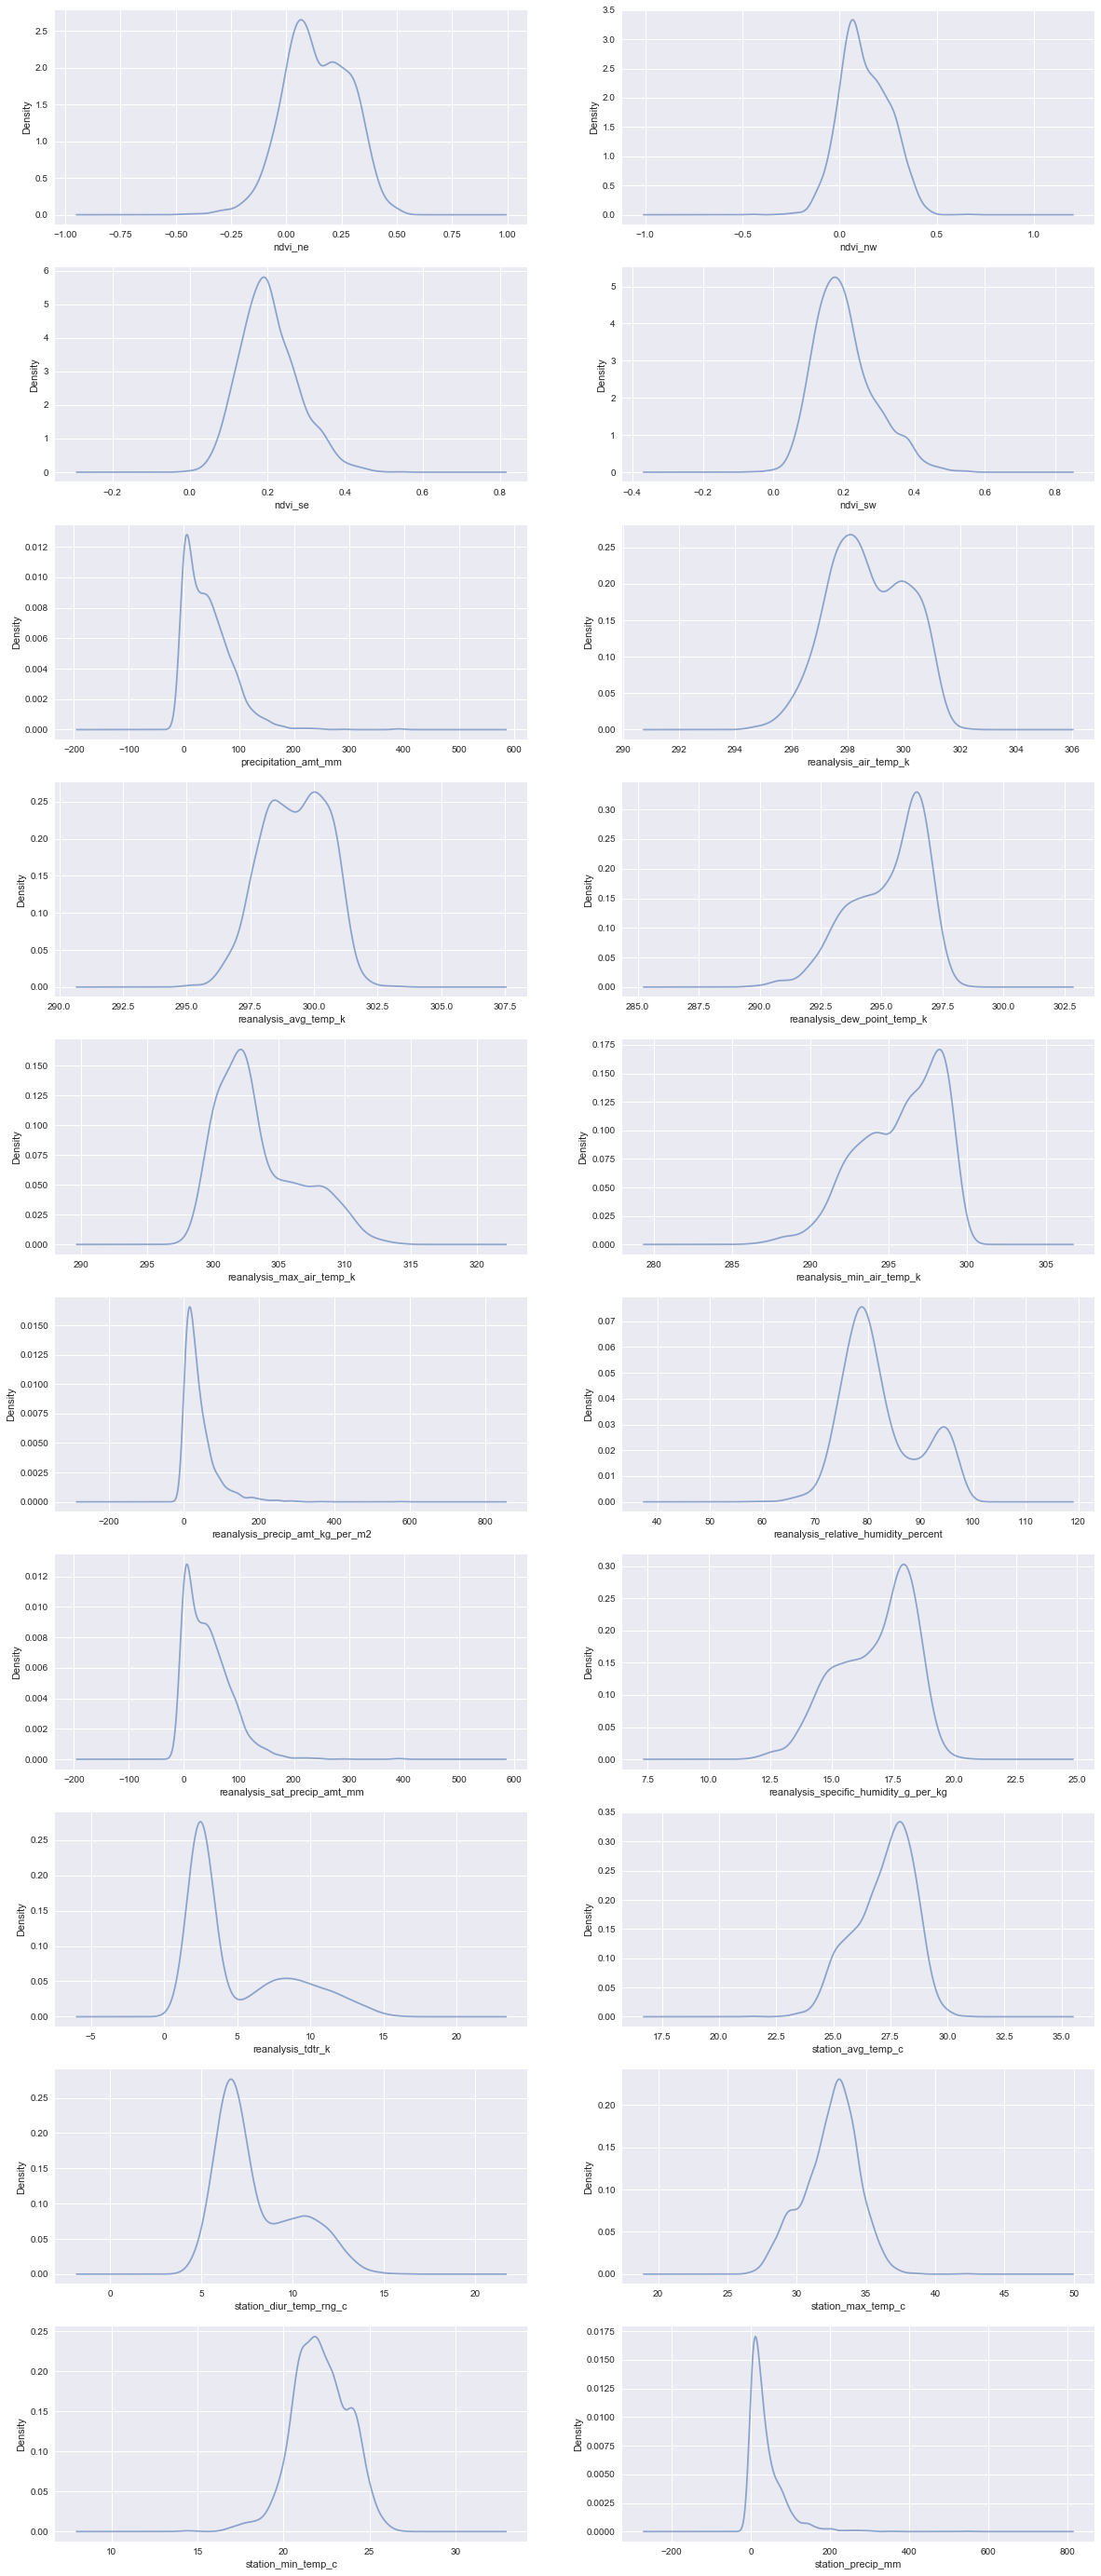

In [231]:
plt.rc("font", size=13)
plt.figure(figsize=(20,50))
alpha=0.6

#--------------------------------------------------#

ax1 = plt.subplot2grid((10,2), (0,0))
data.ndvi_ne.plot(kind="kde",alpha=alpha)
ax1.set_xlabel("ndvi_ne")

ax2 = plt.subplot2grid((10,2),(0,1))
data.ndvi_nw.plot(kind="kde",alpha=alpha)
ax2.set_xlabel("ndvi_nw")


ax3 = plt.subplot2grid((10,2),(1,0))
data.ndvi_se.plot(kind="kde",alpha=alpha)
ax3.set_xlabel("ndvi_se")

ax4 = plt.subplot2grid((10,2),(1,1))
data.ndvi_sw.plot(kind="kde",alpha=alpha)
ax4.set_xlabel("ndvi_sw")


ax5 = plt.subplot2grid((10,2),(2,0))
data.precipitation_amt_mm.plot(kind="kde",alpha=alpha)
ax5.set_xlabel("precipitation_amt_mm")

ax6 = plt.subplot2grid((10,2),(2,1))
data.reanalysis_air_temp_k.plot(kind="kde",alpha=alpha)
ax6.set_xlabel("reanalysis_air_temp_k")


ax7 = plt.subplot2grid((10,2),(3,0))
data.reanalysis_avg_temp_k.plot(kind="kde",alpha=alpha)
ax7.set_xlabel("reanalysis_avg_temp_k")

ax8 = plt.subplot2grid((10,2),(3,1))
data.reanalysis_dew_point_temp_k.plot(kind="kde",alpha=alpha)
ax8.set_xlabel("reanalysis_dew_point_temp_k")


ax9 = plt.subplot2grid((10,2),(4,0))
data.reanalysis_max_air_temp_k.plot(kind="kde",alpha=alpha)
ax9.set_xlabel("reanalysis_max_air_temp_k")

ax10 = plt.subplot2grid((10,2),(4,1))
data.reanalysis_min_air_temp_k.plot(kind="kde",alpha=alpha)
ax10.set_xlabel("reanalysis_min_air_temp_k")


ax11 = plt.subplot2grid((10,2),(5,0))
data.reanalysis_precip_amt_kg_per_m2.plot(kind="kde",alpha=alpha)
ax11.set_xlabel("reanalysis_precip_amt_kg_per_m2")

ax12 = plt.subplot2grid((10,2),(5,1))
data.reanalysis_relative_humidity_percent.plot(kind="kde",alpha=alpha)
ax12.set_xlabel("reanalysis_relative_humidity_percent")


ax13 = plt.subplot2grid((10,2),(6,0))
data.reanalysis_sat_precip_amt_mm.plot(kind="kde",alpha=alpha)
ax13.set_xlabel("reanalysis_sat_precip_amt_mm")

ax14 = plt.subplot2grid((10,2),(6,1))
data.reanalysis_specific_humidity_g_per_kg.plot(kind="kde",alpha=alpha)
ax14.set_xlabel("reanalysis_specific_humidity_g_per_kg")


ax15 = plt.subplot2grid((10,2),(7,0))
data.reanalysis_tdtr_k.plot(kind="kde",alpha=alpha)
ax15.set_xlabel("reanalysis_tdtr_k")

ax16 = plt.subplot2grid((10,2),(7,1))
data.station_avg_temp_c.plot(kind="kde",alpha=alpha)
ax16.set_xlabel("station_avg_temp_c")


ax17 = plt.subplot2grid((10,2),(8,0))
data.station_diur_temp_rng_c.plot(kind="kde",alpha=alpha)
ax17.set_xlabel("station_diur_temp_rng_c")

ax18 = plt.subplot2grid((10,2),(8,1))
data.station_max_temp_c.plot(kind="kde",alpha=alpha)
ax18.set_xlabel("station_max_temp_c")


ax19 = plt.subplot2grid((10,2),(9,0))
data.station_min_temp_c.plot(kind="kde",alpha=alpha)
ax19.set_xlabel("station_min_temp_c")

ax20 = plt.subplot2grid((10,2),(9,1))
data.station_precip_mm.plot(kind="kde",alpha=alpha)
ax20.set_xlabel("station_precip_mm")

#--------------------------------------------------#

### For the variables which are Normally distributed, we have imputed using mean value;
### And for the ones which are Right/Left skewed, we have imputed using median value.

In [232]:
for column in data.columns:
    if column in ['ndvi_ne','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_dew_point_temp_k',
                  'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_relative_humidity_percent',
                  'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k',
                  'station_avg_temp_c','station_diur_temp_rng_c','station_min_temp_c']:
        data[column].fillna(data[column].median(),inplace=True)
    elif column in ['ndvi_nw','ndvi_se','ndvi_sw','reanalysis_avg_temp_k','reanalysis_precip_amt_kg_per_m2',
                    'station_max_temp_c','station_precip_mm']:
        data[column].fillna(data[column].mean(),inplace=True)        

In [233]:
data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                    0
ndvi_nw                                    0
ndvi_se                                    0
ndvi_sw                                    0
precipitation_amt_mm                       0
reanalysis_air_temp_k                      0
reanalysis_avg_temp_k                      0
reanalysis_dew_point_temp_k                0
reanalysis_max_air_temp_k                  0
reanalysis_min_air_temp_k                  0
reanalysis_precip_amt_kg_per_m2            0
reanalysis_relative_humidity_percent       0
reanalysis_sat_precip_amt_mm               0
reanalysis_specific_humidity_g_per_kg      0
reanalysis_tdtr_k                          0
station_avg_temp_c                         0
station_diur_temp_rng_c                    0
station_max_temp_c                         0
station_mi

In [234]:
XCols = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm','Type']
YCols = 'total_cases'

In [235]:
from sklearn.model_selection import train_test_split

XX = data.loc[data["Type"]=="train",XCols]
yy = data.loc[data["Type"]=="train",YCols]
XX = XX.drop(['city','year','weekofyear','week_start_date','Type'],axis=1)
print(XX.shape)
print(yy.shape)
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

(1456, 20)
(1456,)


### Fitting model : Multiple Linear Regression

In [236]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit(XX_train,yy_train)
print(reg.intercept_)
reg.coef_

5157.20845073


array([ -1.01369380e+01,   3.18446508e+01,  -2.99281827e+01,
         6.51440432e+00,   7.70005864e-04,  -1.25408636e+00,
        -1.46515153e+01,  -2.29618367e+00,   1.02436963e+00,
        -2.06664626e-01,   2.41943708e-02,  -4.26440403e+00,
         7.70005864e-04,   2.45436198e+01,  -5.52988275e-01,
         1.68570970e+00,   3.77326700e-01,  -1.72557052e+00,
         1.09710964e-01,   1.03494676e-02])

In [237]:
print(len(reg.coef_))

20


In [238]:
yy_predicted = reg.predict(XX_test)

In [239]:
from sklearn import metrics
from sklearn.metrics import r2_score
metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted)

600.4601237855851

In [240]:
r2_score(yy_test, yy_predicted)

0.15812192576212381

### Predicting on real data

In [241]:
test_X = data.loc[data["Type"]=="test",XCols]

In [242]:
test_X = test_X.drop(['city','year','weekofyear','week_start_date','Type'],axis=1)

In [243]:
Cases_Prediction = test_X
Cases_Prediction.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1456,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1457,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
1458,-0.001500,0.129713,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
1459,0.127317,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
1460,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [244]:
Prediction = reg.predict(Cases_Prediction)
len(Prediction)
Prediction

array([  2.34941237e+01,   2.73784230e+01,   3.51559947e+01,
         2.64478215e+01,   3.48186043e+01,   3.27810047e+01,
         3.82449931e+01,   3.62010290e+01,   4.25169576e+01,
         4.36556280e+01,   3.37798914e+01,   3.96101343e+01,
         4.72055207e+01,   3.90933165e+01,   4.33750529e+01,
         4.80377885e+01,   4.83302701e+01,   4.90397501e+01,
         4.63993492e+01,   6.19362855e+01,   4.52362315e+01,
         4.32906260e+01,   4.29227299e+01,   4.30516386e+01,
         4.06672817e+01,   3.16770421e+01,   3.81730893e+01,
         4.17930629e+01,   3.68564559e+01,   3.50020742e+01,
         3.28401079e+01,   2.92871982e+01,   2.37782456e+01,
         2.24157629e+01,   1.96448194e+01,   3.78898898e+01,
         1.59132281e+01,   1.95381621e+01,   1.88185832e+01,
         1.63744297e+01,   1.92083783e+01,   1.56096820e+01,
         1.82365316e+01,   1.46380270e+01,   1.43819770e+01,
         1.68206009e+01,   1.46766832e+01,   1.49610481e+01,
         2.08419685e+01,

In [245]:
# Columns to use in final output file
Data_Predicted = pd.read_csv("C:/Users/abc/Desktop/Data Analytics/Projects/DengAI - Predicting Disease Spread/dengue_features_test.csv",usecols=["city","year","weekofyear"])

In [246]:
Data_Predicted['total_cases'] = round(pd.Series(Prediction))
Data_Predicted.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,23.0
1,sj,2008,19,27.0
2,sj,2008,20,35.0
3,sj,2008,21,26.0
4,sj,2008,22,35.0


In [247]:
Data_Predicted['total_cases'] = Data_Predicted['total_cases'].astype('int64')

In [248]:
for idx in range(Data_Predicted.shape[0]):
    if Data_Predicted.total_cases[idx]<0:
        Data_Predicted.total_cases[idx] = 0

### Writing final output to .csv File 

In [249]:
Data_Predicted.to_csv('C:/Users/abc/Desktop/Data Analytics/Projects/DengAI - Predicting Disease Spread/Final_Output.csv',index=False)